In [1]:
pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 63 kB 29.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 8.6 MB/s 
     |████████████████████████████████| 9.8 MB 37.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
!pip install kats

     |████████████████████████████████| 6.3 MB 8.2 MB/s 
     |████████████████████████████████| 934 kB 36.7 MB/s 
     |████████████████████████████████| 64 kB 2.0 MB/s 
     |████████████████████████████████| 310 kB 62.9 MB/s 
     |████████████████████████████████| 3.3 MB 38.0 MB/s 
     |████████████████████████████████| 34.5 MB 10 kB/s 
     |████████████████████████████████| 325 kB 46.3 MB/s 
  Created wheel for kats: filename=kats-0.1.0-py3-none-any.whl size=286608 sha256=eebb01926d84c4f975e2201610aa4b7b16b9cefbac29fdb0d8e977a2cfe03b6e
  Stored in directory: /root/.cache/pip/wheels/c8/dd/5b/cc7cb7fc37c5b838c65e504437bba4c1828a3fbb473c0c11be
  Created wheel for fbprophet: filename=fbprophet-0.7-py3-none-any.whl size=6636531 sha256=0b0111a04f6a990557a6d1f76cb61db0916cfddc6ee0f838ed3aa7a3f4e8a137
  Stored in directory: /root/.cache/pip/wheels/82/e8/a8/53f37f0a409bc51f8693e967dcce8f88bfd33632b40a594a28
  Created wheel for gpytorch: filename=gpytorch-1.6.0-py2.py3-none-any.whl size=5

In [4]:
import math
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import yfinance as yf
import seaborn as sns
from pandas.core.indexes import period
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [5]:
import warnings
import matplotlib as mpl
warnings.filterwarnings("ignore")

In [6]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})


Importation des données à partir de yahoo.


In [7]:
RISKY_ASSET = 'AMZN'
START_DATE  = '2019-01-02'
END_DATE    = '2022-01-21'

In [8]:
#2. Download data from Yahoo Finance:
original_df = yf.download(RISKY_ASSET, start=START_DATE,end = END_DATE, adjusted = True)
original_df.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 770 entries, 2019-01-02 to 2022-01-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       770 non-null    float64
 1   High       770 non-null    float64
 2   Low        770 non-null    float64
 3   Close      770 non-null    float64
 4   Adj Close  770 non-null    float64
 5   Volume     770 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 42.1 KB


On peut remarquer que notre data ne contient pas des valeurs aberrantes.

On prend la colonne relative à Adjusted Close price et on la renomme 'adj_close'.

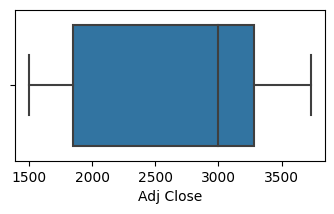

In [9]:
plt.figure(figsize = (4,2))
sns.boxplot(original_df['Adj Close'])

In [ ]:
df = original_df.loc[:, ['Adj Close']]
df= df.squeeze()
adj_close = df.reset_index()


# **1) La Présentation graphique de la série**


### Représentation graphique

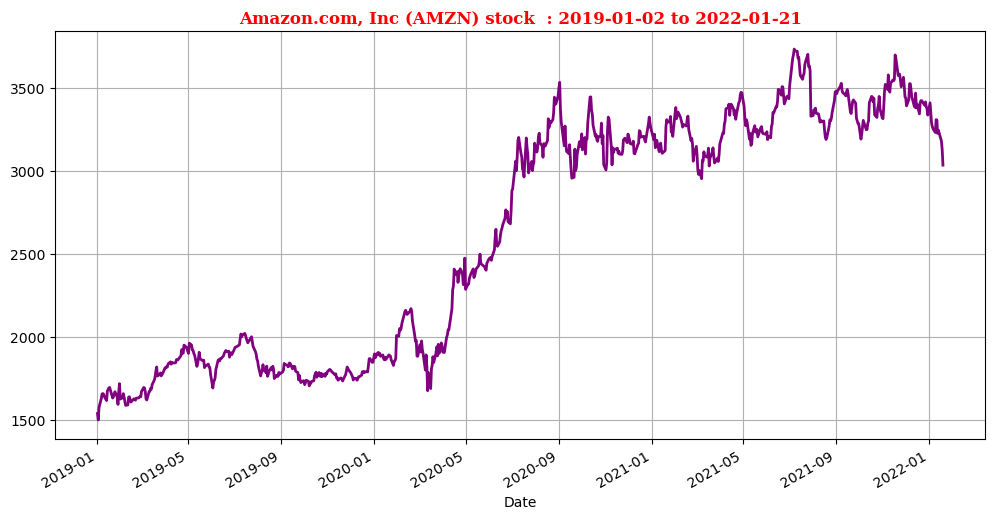

In [ ]:
df.plot(figsize=(12,6),grid=True,color='purple',linewidth = 2)
plt.title(f'Amazon.com, Inc (AMZN) stock  : {START_DATE} to {END_DATE}', 
          fontdict={'family': 'serif', 
                    'color' : 'r',
                    'weight': 'bold',
                    'size': 12})
plt.show()

### Autocorrélogramme simple (ACF) 

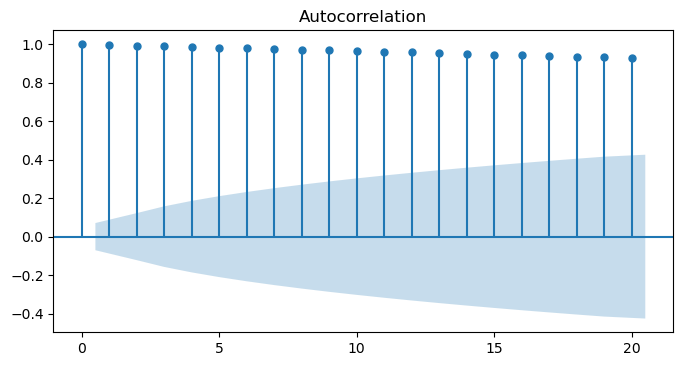

In [ ]:
plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':100})
simple_auto = sm.tsa.acf(df, nlags = 20, fft = False)
tsaplots.plot_acf(df, lags = 20)
plt.show()

### Autocorrélogramme partielle (PAF)

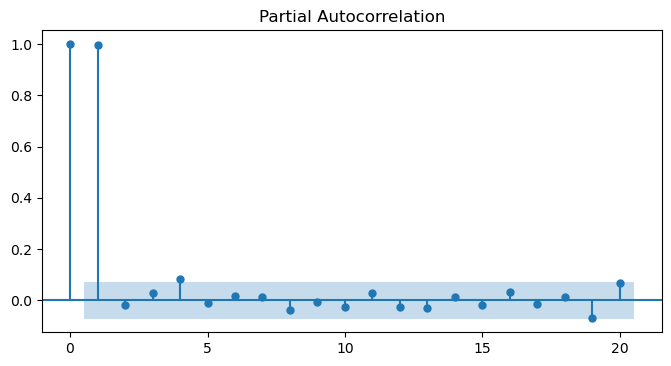

In [ ]:
plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':100})
partial_auto = sm.tsa.pacf(df, nlags = 20)
tsaplots.plot_pacf(df, lags = 20)
plt.show()

#  **2) Décomposition de la série**

Text(0.5, 0.98, 'Décomposition de la série chronologique')

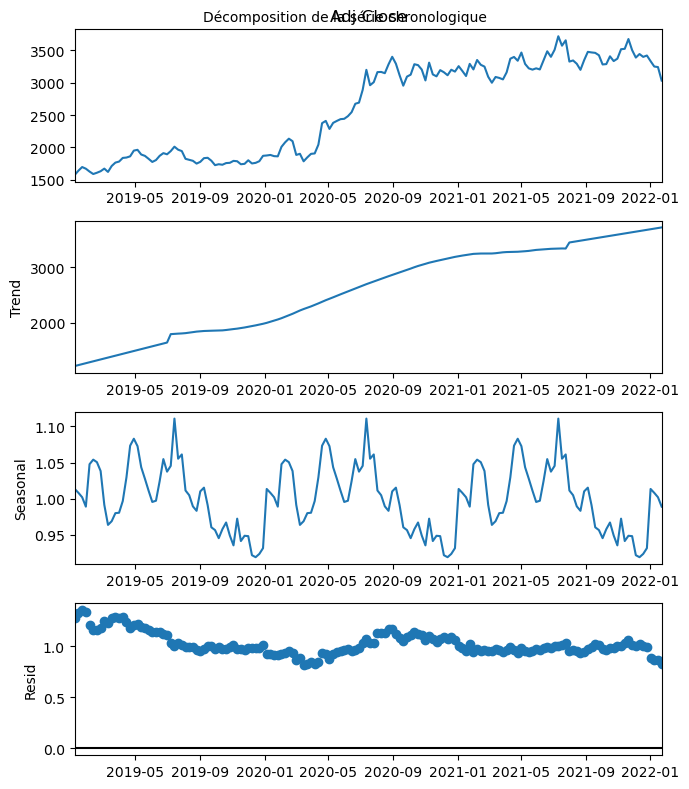

In [ ]:
df_resample = df.resample('W').last()
decomposition_results = seasonal_decompose(df_resample, model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize' : (7,8)})
decomposition_results.plot().suptitle('Décomposition de la série chronologique', fontsize = 10)

### Décomposition en utilisant la bibliothèque Kats

In [10]:
df = original_df.loc[:, ['Adj Close']]
o =df.reset_index()
o = o.rename(columns={"Date": "time", "Adj Close": "close"})

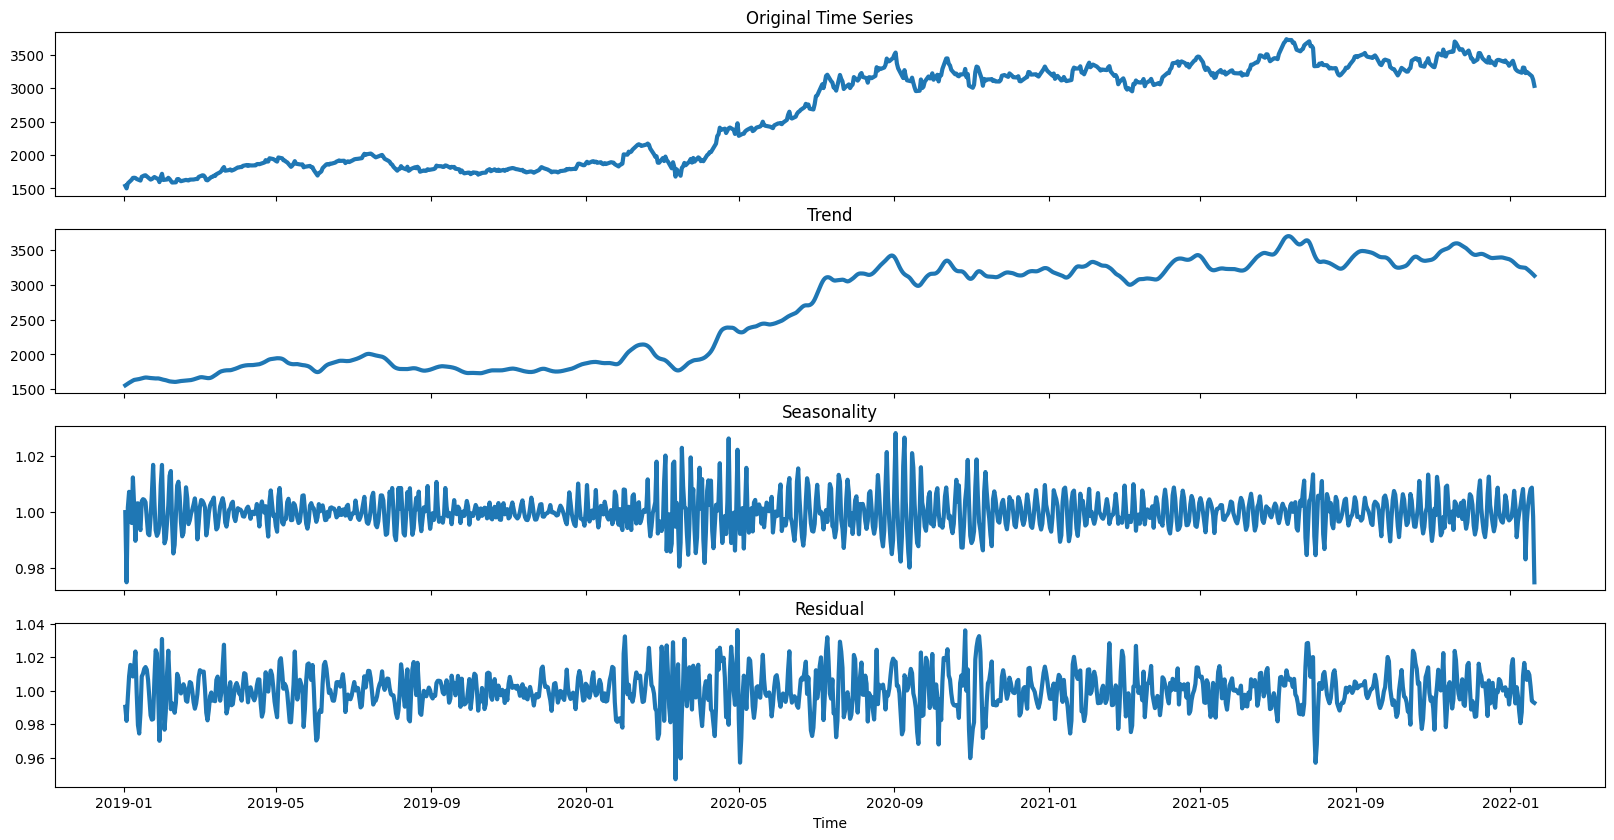

In [11]:
from kats.detectors.outlier import OutlierDetector
from kats.consts import TimeSeriesData
from kats.utils.decomposition import TimeSeriesDecomposition
ts = TimeSeriesData(o)
decomposer = TimeSeriesDecomposition(ts, decomposition="multiplicative")
results = decomposer.decomposer()
fig = decomposer.plot()

The change point is on 2020-06-08 00:00:00


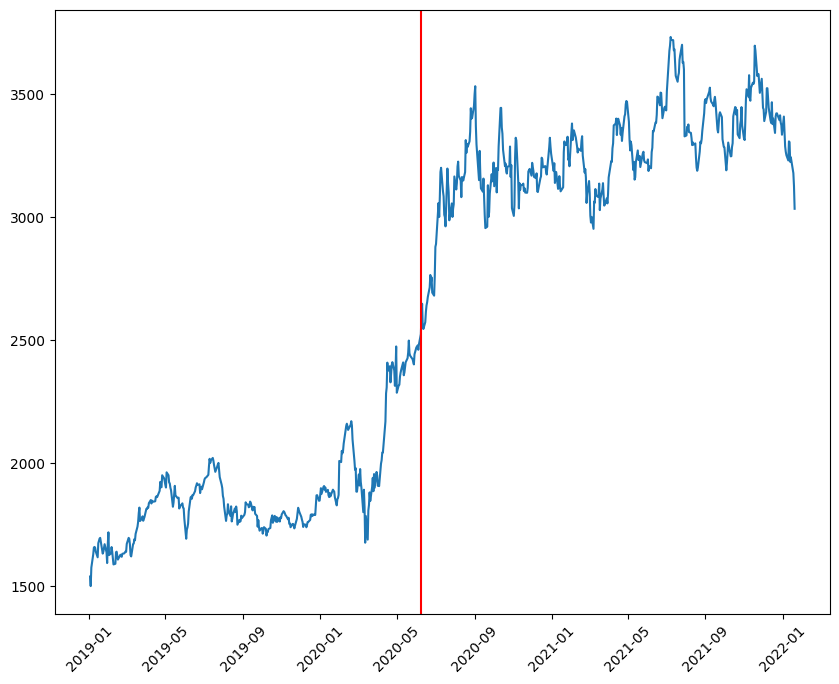

In [12]:
from kats.detectors.cusum_detection import CUSUMDetector
detector = CUSUMDetector(ts)
change_points = detector.detector()
for change_point in change_points:
    print("The change point is on", change_point[0].start_time)
    plt.xticks(rotation=45)
    detector.plot(change_points)
    plt.show()

### Extraction des dataframes de chaque composante

Nous n'avons pas utilisé un modèle additif car il retourne un graphe dont la variance des résidus est plus élevée (entre -500 et 500) que celle du modèle multiplicatif.

In [ ]:
df_reconstructed = pd.concat([decomposition_results.seasonal,
                              decomposition_results.trend,
                              decomposition_results.resid,
                              decomposition_results.observed], axis = 1)
df_reconstructed.columns = ['Seasonal', 'Trend', 'Residual', 'Actual_values']
df_reconstructed.head()

,Seasonal,Trend,Residual,Actual_values
Date,,,,
2019-01-06,1.013620,1210.644769,1.283797,1575.390015
2019-01-13,1.008217,1227.682600,1.325415,1640.560059
2019-01-20,1.002183,1244.720431,1.359747,1696.199951
2019-01-27,0.989183,1261.758262,1.338480,1670.569946
2019-02-03,1.047827,1278.796093,1.213643,1626.229980


# 3) Etude de la non stationnarité de la série

D'après la représentation graphique de la série temporelles, on remarque que la série a une tendance haussière. D'où la série du prix de clôture
des actions Amazon est non stationnaire



###  Test de Dickey et Fuller 

In [ ]:

def adf_test(x,  alpha = 0.05):
    indices = ['Test Statistic', 'p-value', '#of lags used', '#of observations used']
    adf_test = adfuller(x, autolag = 'AIC')
    results = pd.Series(adf_test[0:4], index = indices)
    for key, value in adf_test[4].items():
        results[f'Critical Value({key})'] = value
    pvalue = adf_test[1]
    print(results,"\n")
    if pvalue < alpha:
        print('p-value = %.4f. La série est stationnaire.' % pvalue)
    else:
        print('p-value = %.4f. La série n\'est pas stationnaire.' % pvalue)    
df

Date
2019-01-02    1539.130005
2019-01-03    1500.280029
2019-01-04    1575.390015
2019-01-07    1629.510010
2019-01-08    1656.579956
                 ...     
2022-01-13    3224.280029
2022-01-14    3242.760010
2022-01-18    3178.350098
2022-01-19    3125.979980
2022-01-20    3033.350098
Name: Adj Close, Length: 770, dtype: float64

In [ ]:
adf_test(df)

Test Statistic            -1.454813
p-value                    0.555735
#of lags used              0.000000
#of observations used    769.000000
Critical Value(1%)        -3.438882
Critical Value(5%)        -2.865306
Critical Value(10%)       -2.568775
dtype: float64 

p-value = 0.5557. La série n'est pas stationnaire.


Le test de Dickey Fuller nous a permis de confirmer ce qu'on a trouvé par la méthode heuristique.On a une p_value = 0.54>>0.05 et la statistique de test est supérieure à la valeur critique pour le niveau de confiance séléctionné. D'où la série chronologique n'est pas stationnaire.




# 4)L’ordre de différenciation d dans le modèle ARIMA

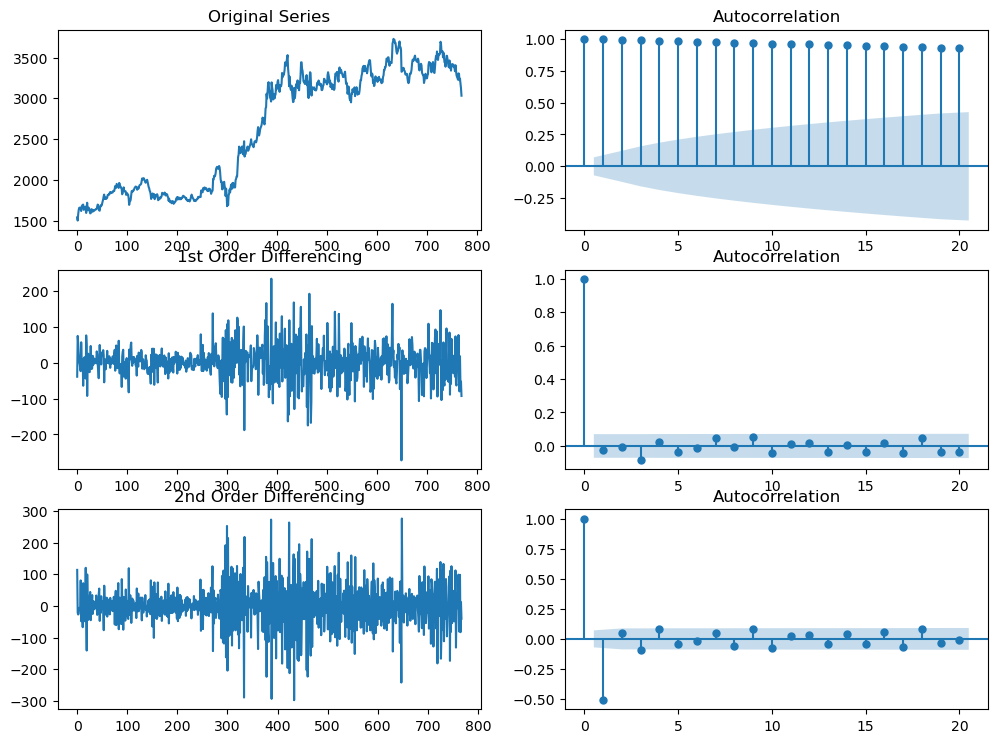

In [ ]:
from numpy import diff
plt.rcParams.update({'figure.figsize':(12,9), 'figure.dpi':100})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(df.values); axes[0, 0].set_title('Original Series')
tsaplots.plot_acf(df.values, ax=axes[0, 1], lags = 20, alpha = 0.05)

# 1st Differencing
axes[1, 0].plot(diff(df.values)); axes[1, 0].set_title('1st Order Differencing')
tsaplots.plot_acf(diff(df.values), ax=axes[1, 1], lags = 20, alpha = 0.05)

# 2nd Differencing
axes[2, 0].plot(diff(diff(df.values))); axes[2, 0].set_title('2nd Order Differencing')
tsaplots.plot_acf(diff(diff(df.values)), ax=axes[2, 1], lags = 20, alpha = 0.05)

plt.show()

La série temporelle atteint la stationnarité au premier ordre de
différenciation ;
Mais en regardant le tracé d’autocorrélation pour la 2
me différenciation, le décalage passe
assez rapidement dans la zone négative lointaine ;
Ce qui indique que la série pourrait avoir été surdifférenciée, donc on peut garder d = 1

# 5) L’ordre du terme AR(p)

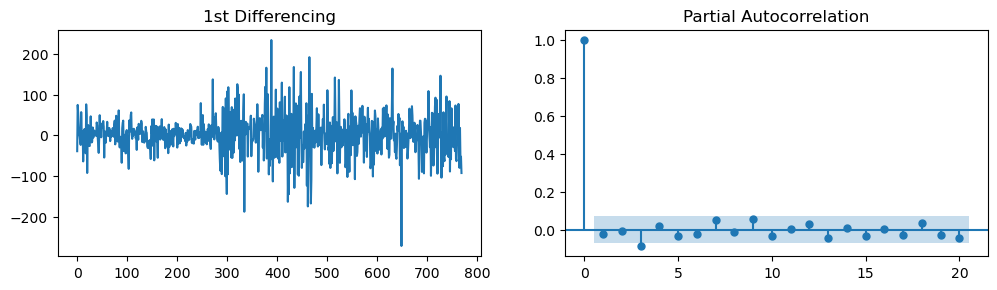

In [ ]:
from numpy import diff
plt.rcParams.update({'figure.figsize':(12,9), 'figure.dpi':100})
fig, axes = plt.subplots(1, 2, figsize = (12,3), dpi = 100)

# 1st Differencing
axes[0].plot(diff(df.values));axes[0].set_title('1st Differencing')
tsaplots.plot_pacf(diff(df.values), ax = axes[1], lags = 20, alpha = 0.05)
plt.show()

#6)   L’ordre du terme MA(q)

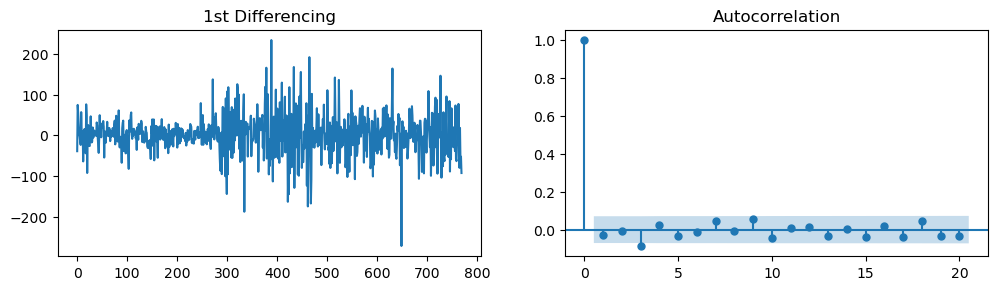

In [ ]:
plt.rcParams.update({'figure.figsize':(12,9), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, figsize = (12,3), dpi = 100)
# 1st Differencing
axes[0].plot(diff(df.values));axes[0].set_title('1st Differencing')
tsaplots.plot_acf(diff(df.values), ax = axes[1], lags = 20, alpha = 0.05)
plt.show()

ARIMA choisi c'est ARIMA(1,1,1)

In [ ]:
model = sm.tsa.ARIMA(df.values, (0,1,1))
model = model.fit(disp = -1)
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  769
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4088.243
Method:                       css-mle   S.D. of innovations             49.273
Date:                Fri, 04 Feb 2022   AIC                           8182.487
Time:                        13:16:31   BIC                           8196.422
Sample:                             1   HQIC                          8187.850
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9477      1.729      1.126      0.260      -1.442       5.337
ma.L1.D.y     -0.0268      0.037     -0.732      0.464      -0.098       0.045
                                    Roots           

On a la p-value de MA(1)>0.05. D'où on considèrera ARIMA(0,1,0)

In [ ]:
model = sm.tsa.ARIMA(df.values, (0,1,0))
model = model.fit(disp = 0)
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  769
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4088.512
Method:                           css   S.D. of innovations             49.290
Date:                Fri, 04 Feb 2022   AIC                           8181.024
Time:                        13:16:32   BIC                           8190.315
Sample:                             1   HQIC                          8184.600
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9431      1.777      1.093      0.274      -1.541       5.427


# 7) Gestion de la sous-différenciation ou sur-différenciation

Si la série est légèrement sous-différenciée, l’ajout d’un ou plusieurs termes AR supplémentaires la compense généralement.

De même, s’elle est légèrement trop différenciée, on rajoutte un terme MA supplémentaire

# 8)Choix de modèle ARIMA sur la série correctement stationnarisée à l’aide des autocorrélations (simples, partielles) et des critères d’information (AIC et BIC)






In [ ]:
def min_aic():
    p=0
    q=0
    d=1
    pdq=[]
    aic=[]
    m=0
    results = []
    for p in range(5):
        for d in range(1,3):
            for q in range(5):
                try:
                    arima_mod=sm.tsa.ARIMA(original_df['Adj Close'],(p,d,q)).fit(transparams=True)
                    x=arima_mod.aic
                    x1= p,d,q
                    aic.append(x)
                    pdq.append(x1)
                except:
                    pass
    aic.sort()
    good_aic = aic[0:4]
    print("\n Selon le principe de parcimonie les meilleurs modèles sont: \t" )
    for g in good_aic:
        m = good_aic.index(g)
        results.append(pdq[m])
    return results
    
result = min_aic()
print(result)


 Selon le principe de parcimonie les meilleurs modèles sont: 	
[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3)]


In [ ]:
fitted_models = []
for res in result:
    model = ARIMA(df, order = res)
    model_fit = model.fit(disp=0)
    fitted_models.append(model_fit)

In [ ]:
fitted_models[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  769
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4088.512
Method:                           css   S.D. of innovations             49.290
Date:                Fri, 04 Feb 2022   AIC                           8181.024
Time:                        14:11:23   BIC                           8190.315
Sample:                             1   HQIC                          8184.600
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9431      1.777      1.093      0.274      -1.541       5.427
==============================================================================
"""

In [ ]:
fitted_models[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  769
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4088.243
Method:                       css-mle   S.D. of innovations             49.273
Date:                Fri, 04 Feb 2022   AIC                           8182.487
Time:                        14:11:35   BIC                           8196.422
Sample:                             1   HQIC                          8187.850
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9477      1.729      1.126      0.260      -1.442       5.337
ma.L1.D.Adj Close    -0.0268      0.037     -0.732      0.464      -0.098       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           37.3497           +0.0000j           37.3497            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
fitted_models[2].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  769
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -4088.205
Method:                       css-mle   S.D. of innovations             49.270
Date:                Fri, 04 Feb 2022   AIC                           8184.411
Time:                        14:11:56   BIC                           8202.991
Sample:                             1   HQIC                          8191.562
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9494      1.709      1.141      0.254      -1.400       5.299
ma.L1.D.Adj Close    -0.0282      0.037     -0.772      0.440      -0.100       0.043
ma.L2.D.Adj Close    -0.0099      0.036     -0.276      0.783      -0.080       0.061
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            8.7210           +0.0000j            8.7210            0.0000
MA.2          -11.5701           +0.0000j           11.5701            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
fitted_models[3].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  769
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -4085.249
Method:                       css-mle   S.D. of innovations             49.081
Date:                Fri, 04 Feb 2022   AIC                           8180.499
Time:                        14:12:08   BIC                           8203.724
Sample:                             1   HQIC                          8189.438
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9647      1.547      1.270      0.204      -1.068       4.998
ma.L1.D.Adj Close    -0.0232      0.036     -0.640      0.522      -0.094       0.048
ma.L2.D.Adj Close    -0.0142      0.035     -0.404      0.686      -0.083       0.055
ma.L3.D.Adj Close    -0.0888      0.036     -2.455      0.014      -0.160      -0.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.1519           -0.0000j            2.1519           -0.0000
MA.2           -1.1557           -1.9746j            2.2880           -0.3343
MA.3           -1.1557           +1.9746j            2.2880            0.3343
-----------------------------------------------------------------------------
"""

Nous constatons que le meilleur modèle ARIMA est(0,1,0) car  il stationnarise correctement la série à l’aide des autocorrélations (simples, partielles) et des critères d’information (AIC et BIC).

# 9) Test de Ljung-Box (Absence d’autocorrélation):
#### Le test de Ljung-Box utilise les hypothèses suivantes :

##### H0: Les résidus sont distribués indépendamment.

##### HUN: Les résidus ne sont pas distribués indépendamment; ils présentent une corrélation en série.


###### La statistique de test pour le test Ljung-Box est la suivante :
### ![image.png](attachment:image.png)
###### où:
rn L’autocorrélation empirique d’ordre n des résidus εt 
k Nombre de paramètres 
T Nombre de périodes.


In [ ]:
import statsmodels.api as sm
print("Ljung Box_stat:",sm.stats.acorr_ljungbox(model.resid, lags = [20])[0]," \nLjung Box_pvalue", sm.stats.acorr_ljungbox(model.resid, lags = [20])
[1])


Ljung Box_stat: [20.82492806]  
Ljung Box_pvalue [0.40750091]


On a p-value>0.05 donc on accepte H0 : Les résidus sont distribués indépendamment.

### Test de Breusch Pagan
L’hétéroscédasticité est un problème parce que la régression des moindres carrés ordinaires (OLS) suppose que les résidus proviennent d’une population qui a une homoscédasticité, ce qui signifie une variance constante. Lorsque l’hétéroscédasticité est présente dans une analyse de régression, les résultats de l’analyse deviennent difficiles à faire confiance.
Un test de Breusch-Pagan utilise les hypothèses nulles et alternatives suivantes :

L’hypothèse nulle (H0): L’homoscédasticité est présente.

L’hypothèse alternative : (Ha) : L’homoscédasticité n’est pas présente (c’est-à-dire que l’hétéroscédasticité existe)

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan,het_white
df2=df_resample.to_frame()

df2['TIME'] = np.array(range(len(df_resample)))
df2.rename(columns={'Adj Close':'Close'},inplace=True)
from statsmodels.formula.api import ols
f ='Close~TIME'
df_model = ols(formula=f, data=df2).fit()
print(df_model.summary())
def test_model(col):
    s=[]
    for i in col:
        a=[1,i]
        s.append(a)
    return (np.array(s))
adj_model = test_model(df_resample)
bp_test = het_breuschpagan(df_model.resid,adj_model)

print('La p-value est' ,bp_test[1])

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     926.7
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           5.49e-68
Time:                        13:16:59   Log-Likelihood:                -1124.5
No. Observations:                 160   AIC:                             2253.
Df Residuals:                     158   BIC:                             2259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1473.3010     43.210     34.097      0.0

On a la p-value des résultats du test est supérieur à alpha (niveau de signification), nous ne pouvons pas rejeter H0 et on conclut que les données sont homoscédastiques.

### Test de Jarque Bera
Le test de Jarque-Bera est un test d'hypothèse qui cherche à déterminer si des données suivent une loi normale.
La statistique du test de Jarque-Bera est toujours un nombre positif et plus il est éloigné de zéro, plus il est prouvé que les données de l’échantillon ne suivent pas une distribution normale.
H_0: les données suivent une loi normale.
H_1: les données ne suivent pas une loi normale.
La variable de Jarque-Bera s'écrit

![image.png](attachment:image.png)
avec:

#### n, le nombre d'observations
#### k, le nombre de variables explicatives si les données proviennent des résidus d'une régression linéaire. Sinon, k reste nul.
#### S, le coefficient d'asymétrie de l'échantillon testé.(moment d’ordre 3 et asymétrie)
#### K, la kurtosis de l'échantillon testé. (moment d’ordre 4 et queue de distribution).

In [ ]:
from scipy import stats
jarque_bera_test = stats.jarque_bera(model.resid)
print("Statistic :",jarque_bera_test[0],"\np-value :",jarque_bera_test[1])

Statistic : 308.1819262128529 
p-value : 0.0


On a p-value est significativement inférieur à 0,05, nous rejetons l’hypothèse nulle et acceptons l’hypothèse alternative.Ainsi, nous avons suffisamment de preuves pour dire que ces données ont une asymétrie et une kurtose significativement différentes d’une distribution normale.

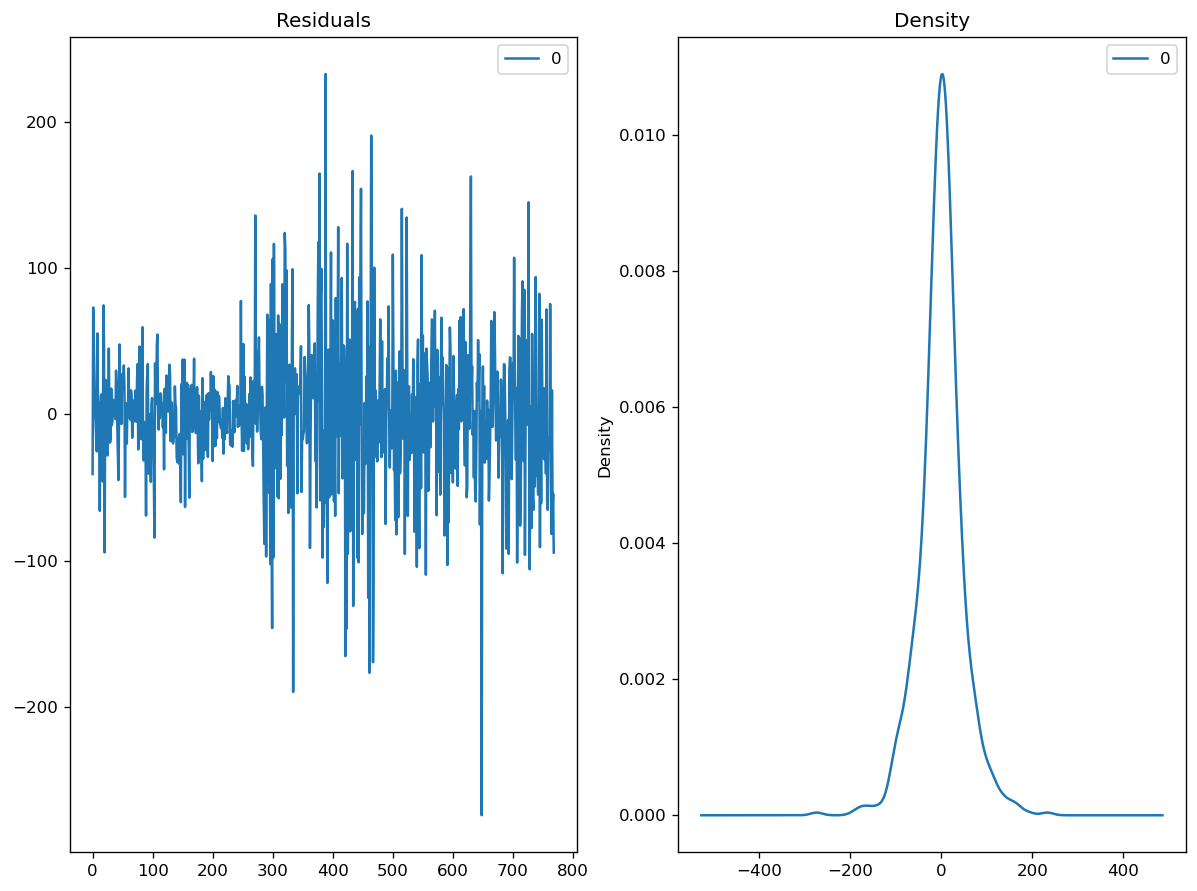

In [ ]:
import scipy.stats as stats
stats.jarque_bera(model.resid)[1]

residuals=pd.DataFrame(model.resid)
fig,ax=plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title="Density", ax=ax[1])
plt.show()

# 10) Estimation du (des) modèle(s) ARIMA sélectionné(s)

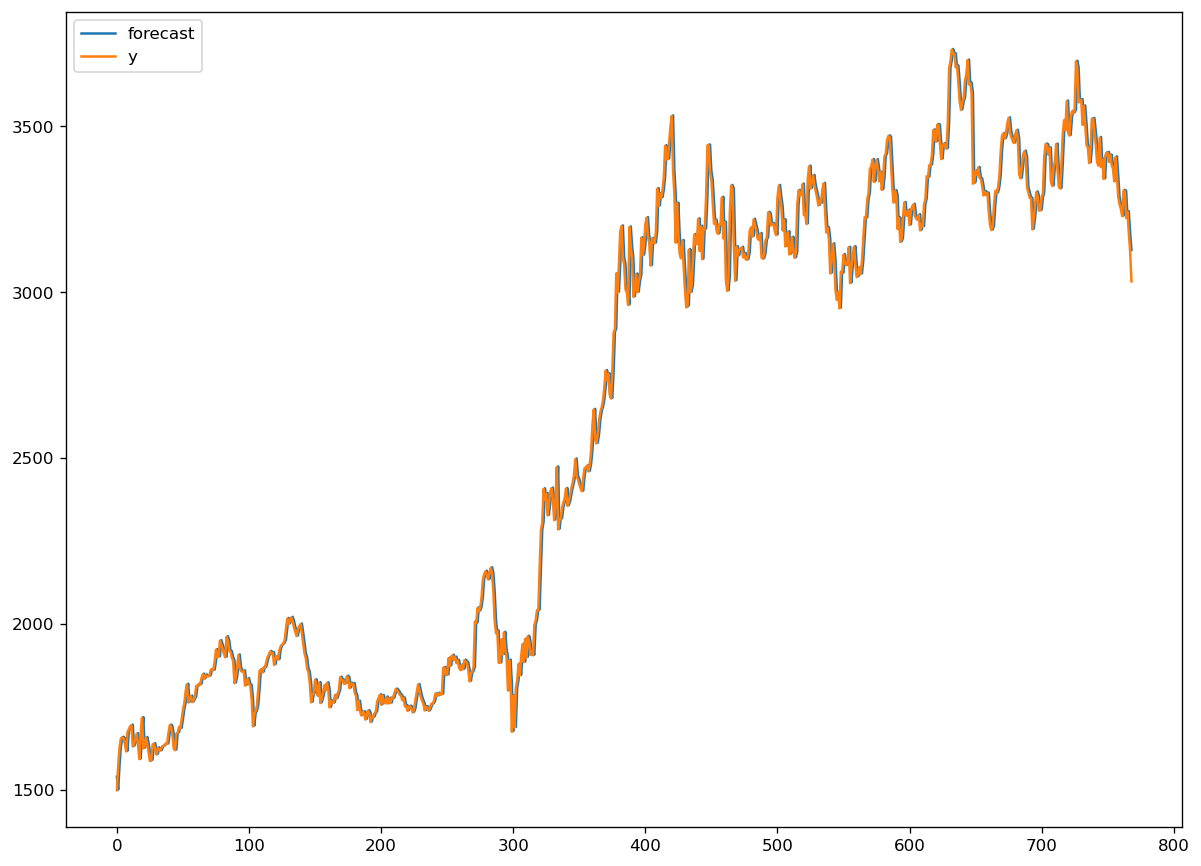

In [ ]:
model.plot_predict(dynamic=False)
plt.show()

# 11) Interprétation des tracés résiduels dans le modèle ARIMA (Standardized residuals, Distributionof residuals, Q-Q plot & ACF plot)

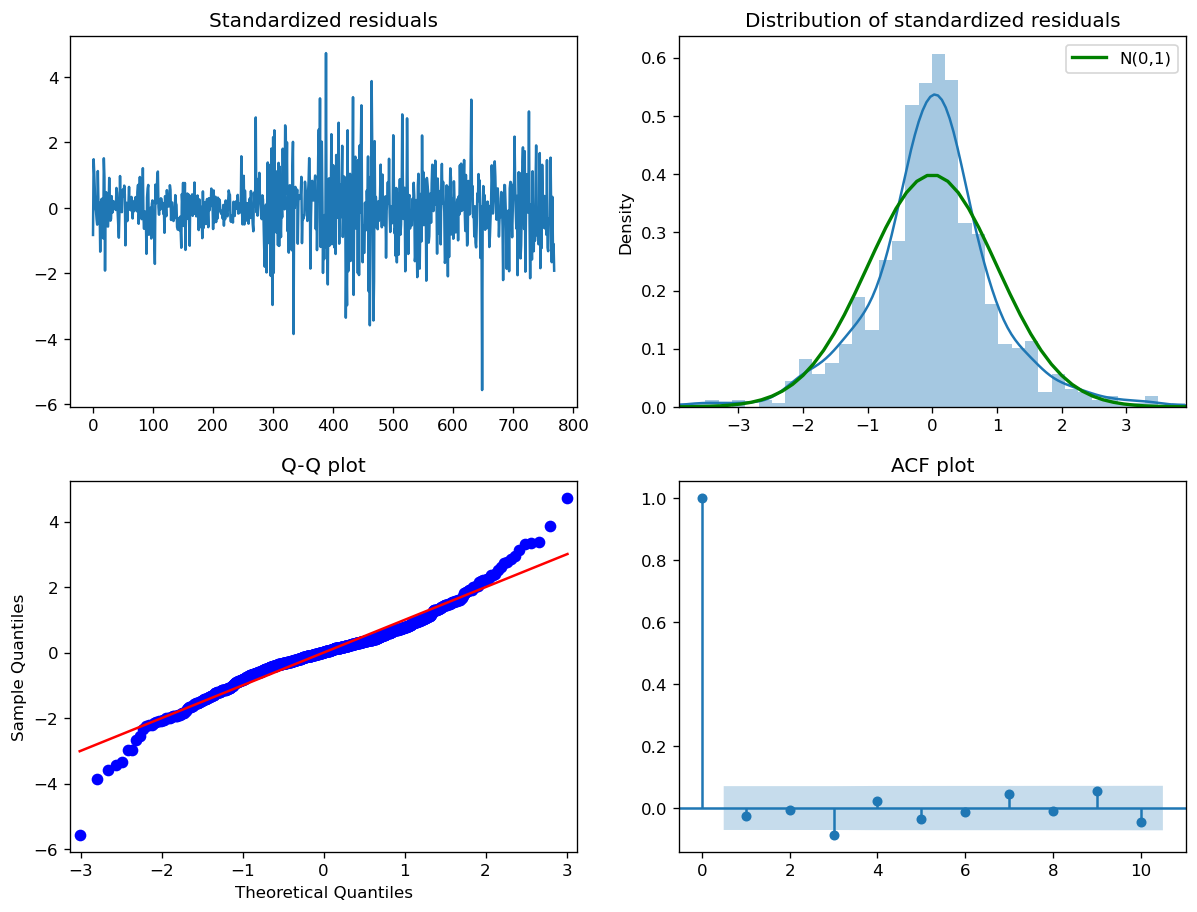

In [ ]:
import scipy.stats as scs

def arima_diagnostic(resids, n_lags=40):
 # create placeholder subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    r = resids
    resids = (r - np.nanmean(r)) / np.nanstd(r)
    resids_nonmissing = resids[~(np.isnan(resids))]
    # residuals over time
    sns.lineplot(x=np.arange(len(resids)), y=resids, ax=ax1)
    ax1.set_title('Standardized residuals')
    # distribution of residuals
    x_lim = (-1.96 * 2, 1.96 * 2)
    r_range = np.linspace(x_lim[0], x_lim[1])
    norm_pdf = scs.norm.pdf(r_range)
    sns.distplot(resids_nonmissing, hist=True, kde=True,
    norm_hist=True, ax=ax2)
    ax2.plot(r_range, norm_pdf, 'g', lw=2, label='N(0,1)')
    ax2.set_title('Distribution of standardized residuals')
    ax2.set_xlim(x_lim)
    ax2.legend()
    # Q-Q plot
    qq = sm.qqplot(resids_nonmissing, line='s', ax=ax3)
    ax3.set_title('Q-Q plot')
    # ACF plot
    tsaplots.plot_acf(resids, ax=ax4, lags=n_lags, alpha=0.05)
    ax4.set_title('ACF plot')
    return fig


arima_diagnostic(model.resid, 10)
plt.show()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8182.232, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8181.024, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8182.493, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8182.485, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8180.219, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.544 seconds


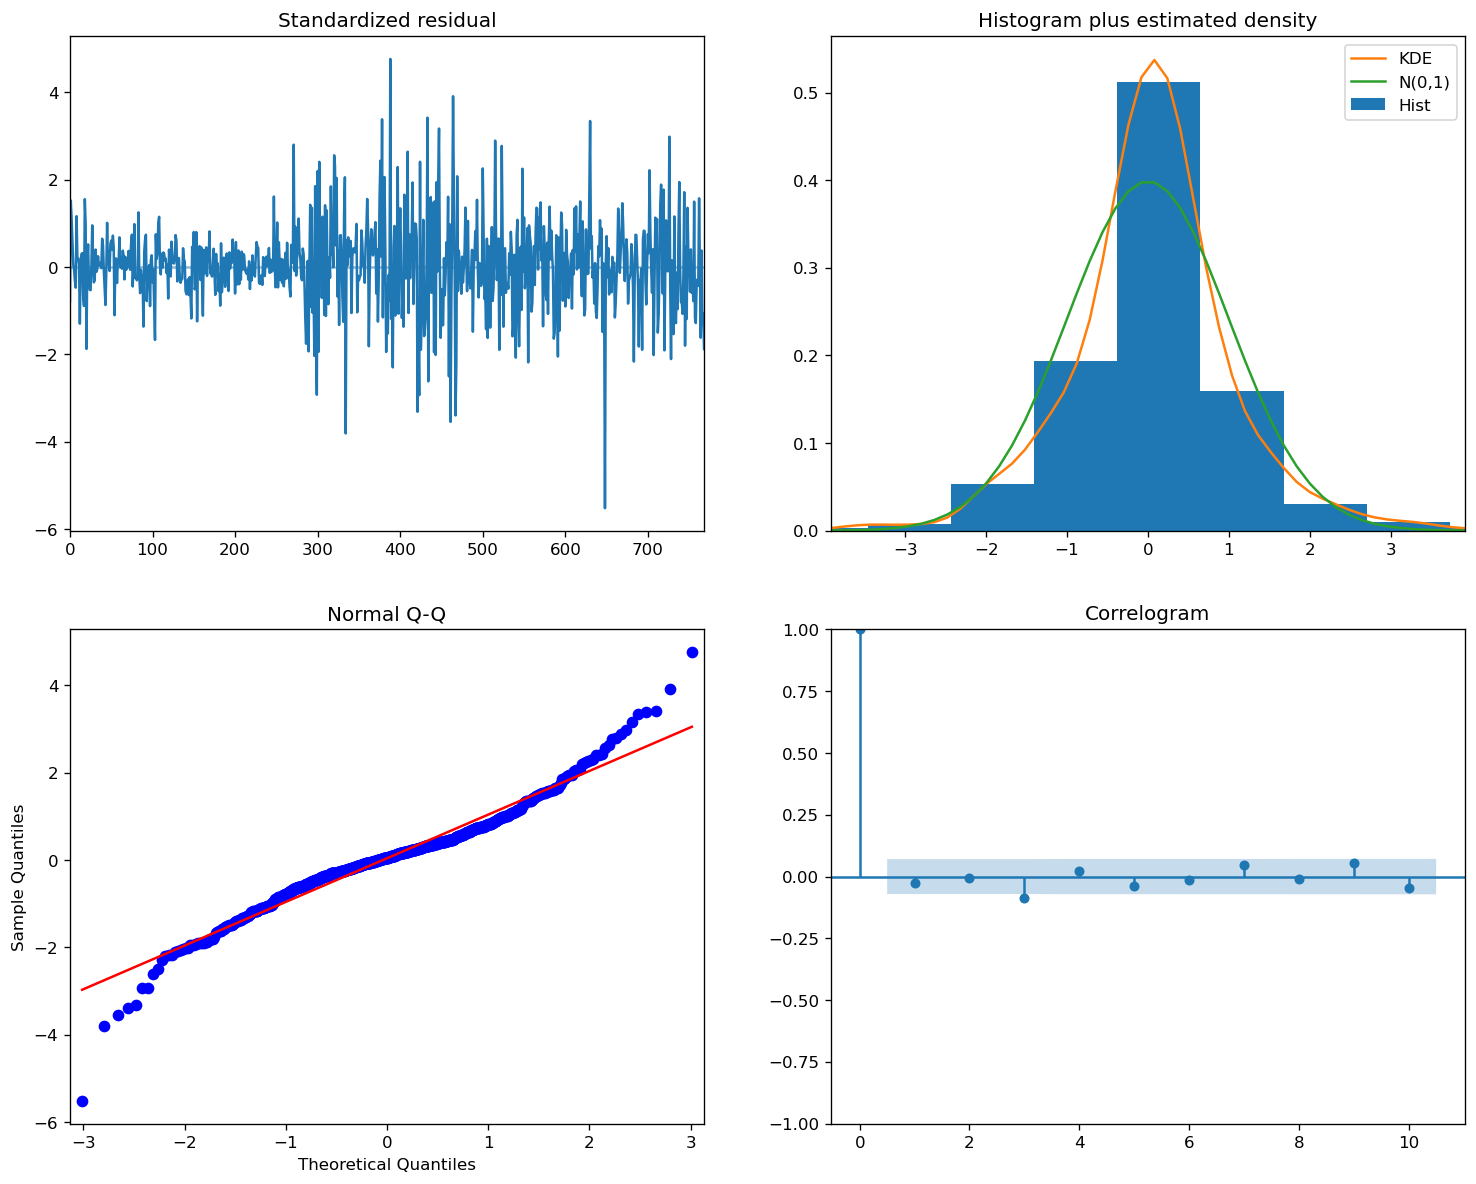

In [ ]:
import pmdarima as pm
auto_model = pm.auto_arima(df.values, start_p=1, start_q=1, test='adf', max_p=3, max_q=3, m=1,d=None, seasonal=False,
                      start_P=0, D=0, trace=True, error_action='ignore', supress_warnings=True, stepwise=True)
auto_model.summary()
auto_model.plot_diagnostics(figsize=(15,12))
plt.show()


#Interpretations:
- "Standerdized residual": Les erreurs résiduelles semblent fluctuer autour d'une moyenne de zéro. Elle semble a peu près stationnaire, sans tendance marquée à long terme.

- "Histogram plus estimated density": Le diagramme de densité montre une distribution normale avec une moyenne nulle.

- "Normal Q-Q": On peut constater que les points sont alignés autour de la ligne rouge. Alors la distribution et biaisée.

- "Correlogram ACF": L'ACF montre que les erreurs résiduelles ne sont pas autocorrélées. Alors il n'existe aucune tendance dans le modèle

# 12) Sélection du modèle pertinent 

On a qu'un seul modèle ARIMA(0,1,0)

# 13) Out-of-Time Cross validation

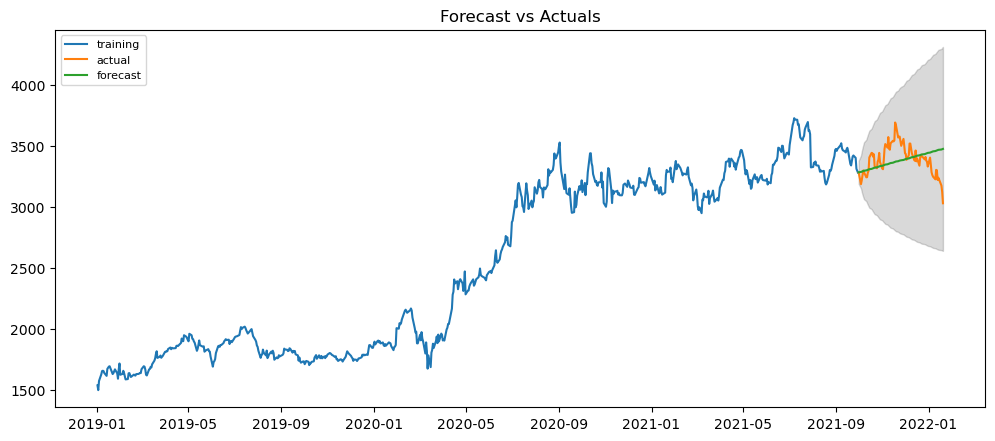

In [ ]:
from statsmodels.tsa.stattools import acf


train = df[:693]
test  = df[693:]

model_train = sm.tsa.ARIMA(train, order=(0, 1, 0))
fitted = model_train.fit(disp=-1)
#Forecast
fc, se, conf = fitted.forecast(77, alpha=0.05) #%95 conf
#Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
#plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 14) Mesures de précision pour les prévisions

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.0322343916891598,
 'me': -9.751107885901382,
 'mae': 109.14670678608469,
 'mpe': -0.0014637070533276406,
 'rmse': 142.4261508847691,
 'corr': -0.1393240932886062,
 'minmax': 0.031281031244554836}

In [ ]:
def forecast_accuracy1(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
    return ({'mape':mape})
forecast_accuracy1(fc, test.values)

{'mape': 0.0322343916891598}

---> Notre modèle est précis à environ 96,3%.

# 15) Calcul de prévisions hors échantillon du 22/01/2022 au 22/02/2022

In [ ]:
d=len(df)
fig = model.predict(1,d+30)

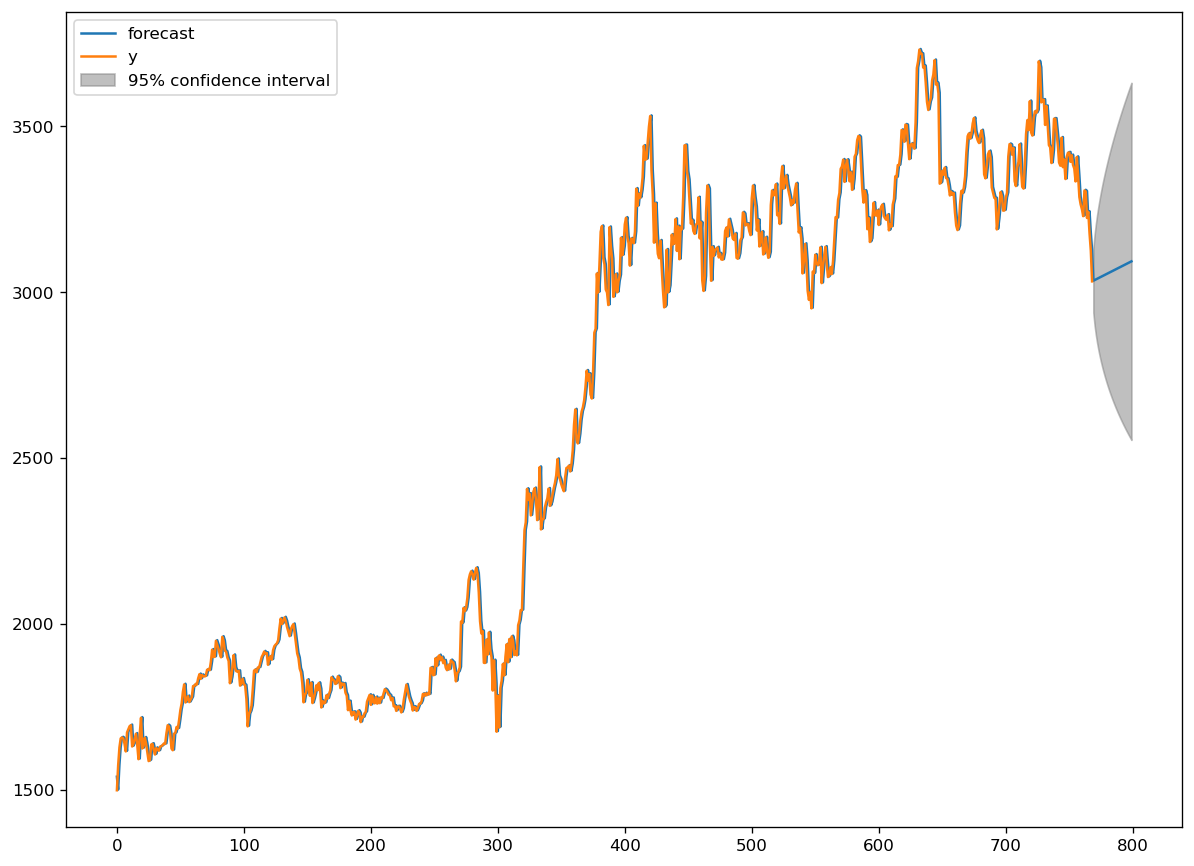

In [ ]:
fig = model.plot_predict(1,d+30)

# 16) L'application de SARIMAX 


In [ ]:
import itertools
list_results_aic=[]
list_param=[]
Lparam_seasonal = []
Laic = []
list_param_seasonal = []
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model_sarimax = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            supress_warnings=True)

            results = model_sarimax.fit()
            Laic.append(results.aic)
            Lparam_seasonal.append(param_seasonal)
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue
print(min(list_results_aic))

7946.004582368951


In [ ]:
m = list_results_aic.index(min(list_results_aic))
print("\n Selon le principe de parcimonie le meilleur modèle est: \t" )
print('ARIMA{}x{}12 - AIC:{}'.format(list_param[m], list_param_seasonal[m], list_results_aic[m]))



 Selon le principe de parcimonie le meilleur modèle est: 	
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:7946.004582368951


In [ ]:
L = pd.date_range(start = '2022-01-22' , end = '2022-02-22')
print(L)
t=len(df)
model_sarimax = sm.tsa.statespace.SARIMAX(df,order=list_param[m],seasonal_order=list_param_seasonal[m])
results=model_sarimax.fit()
forcast =results.predict(start=t,end= t+31,dynamic=True)
forcast.values
new_df= pd.DataFrame(data = forcast.values, columns = ["Forcast"], index = L) 

DatetimeIndex(['2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06',
               '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10',
               '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14',
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22'],
              dtype='datetime64[ns]', freq='D')


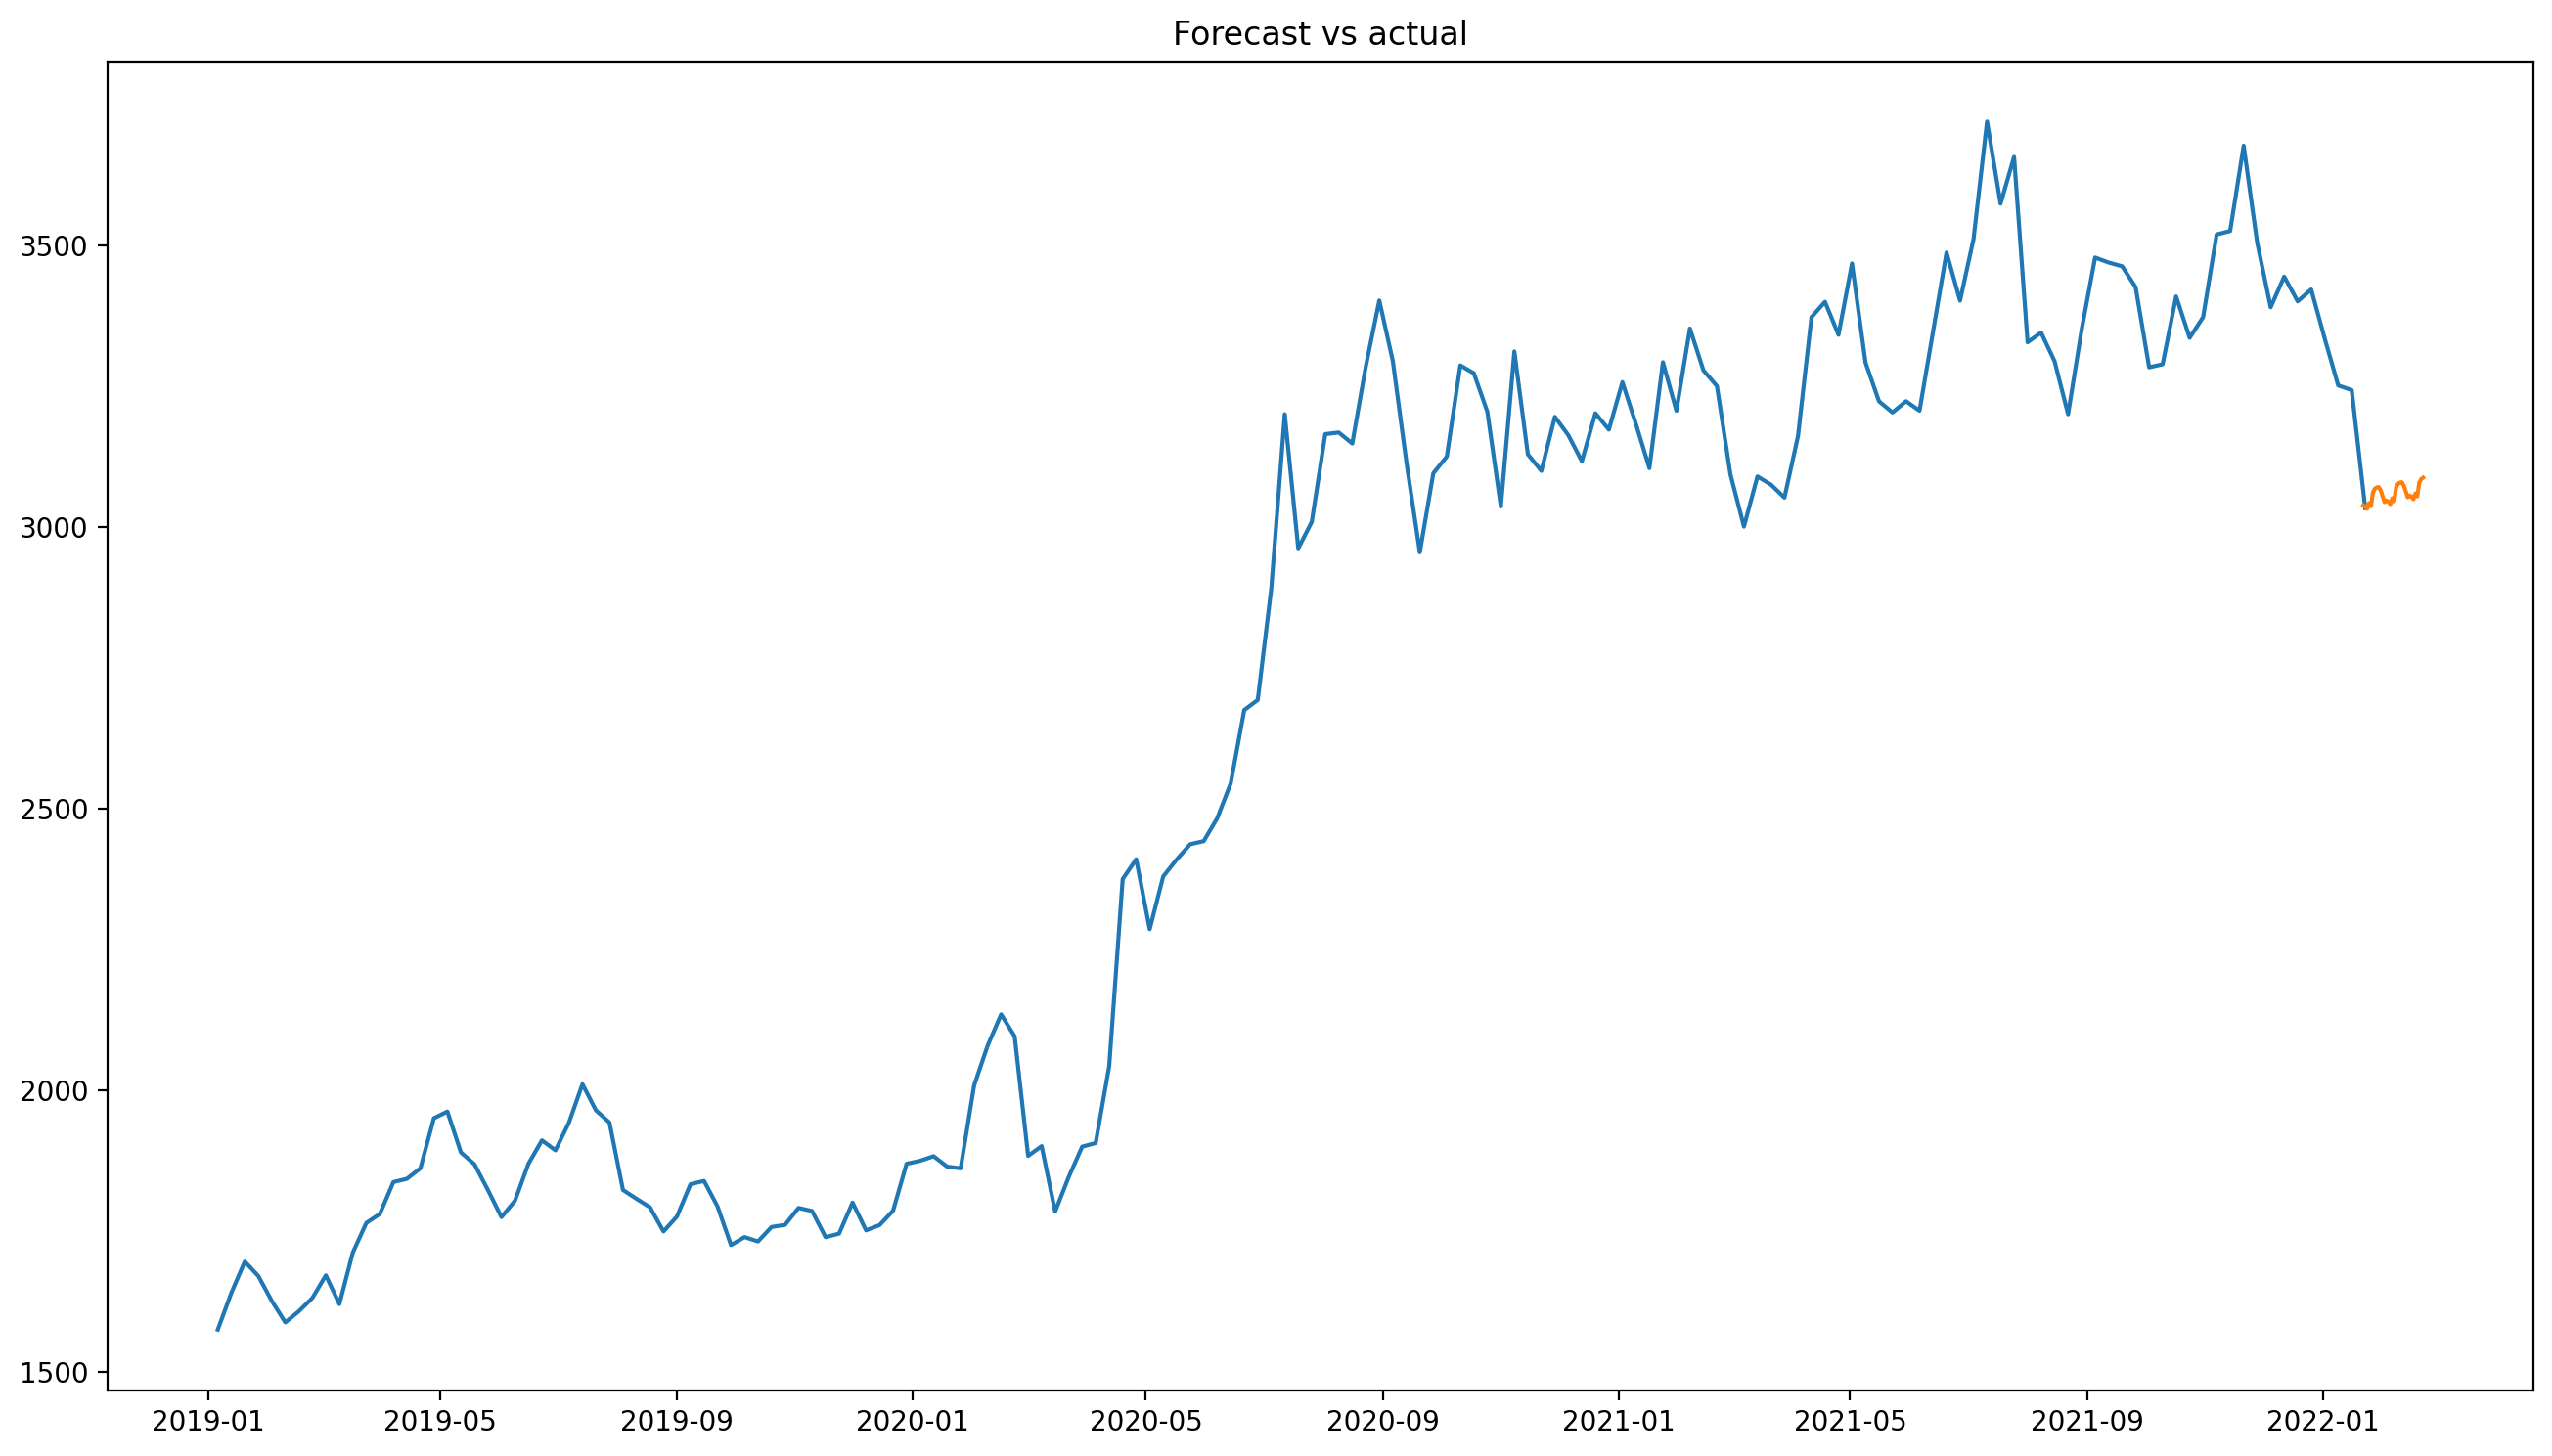

In [ ]:
plt.figure(figsize=(16,9), dpi=200)

plt.plot(df, label='actual')

plt.plot(new_df["Forcast"], label='forecast')

plt.title('Forecast vs actual')



plt.show()

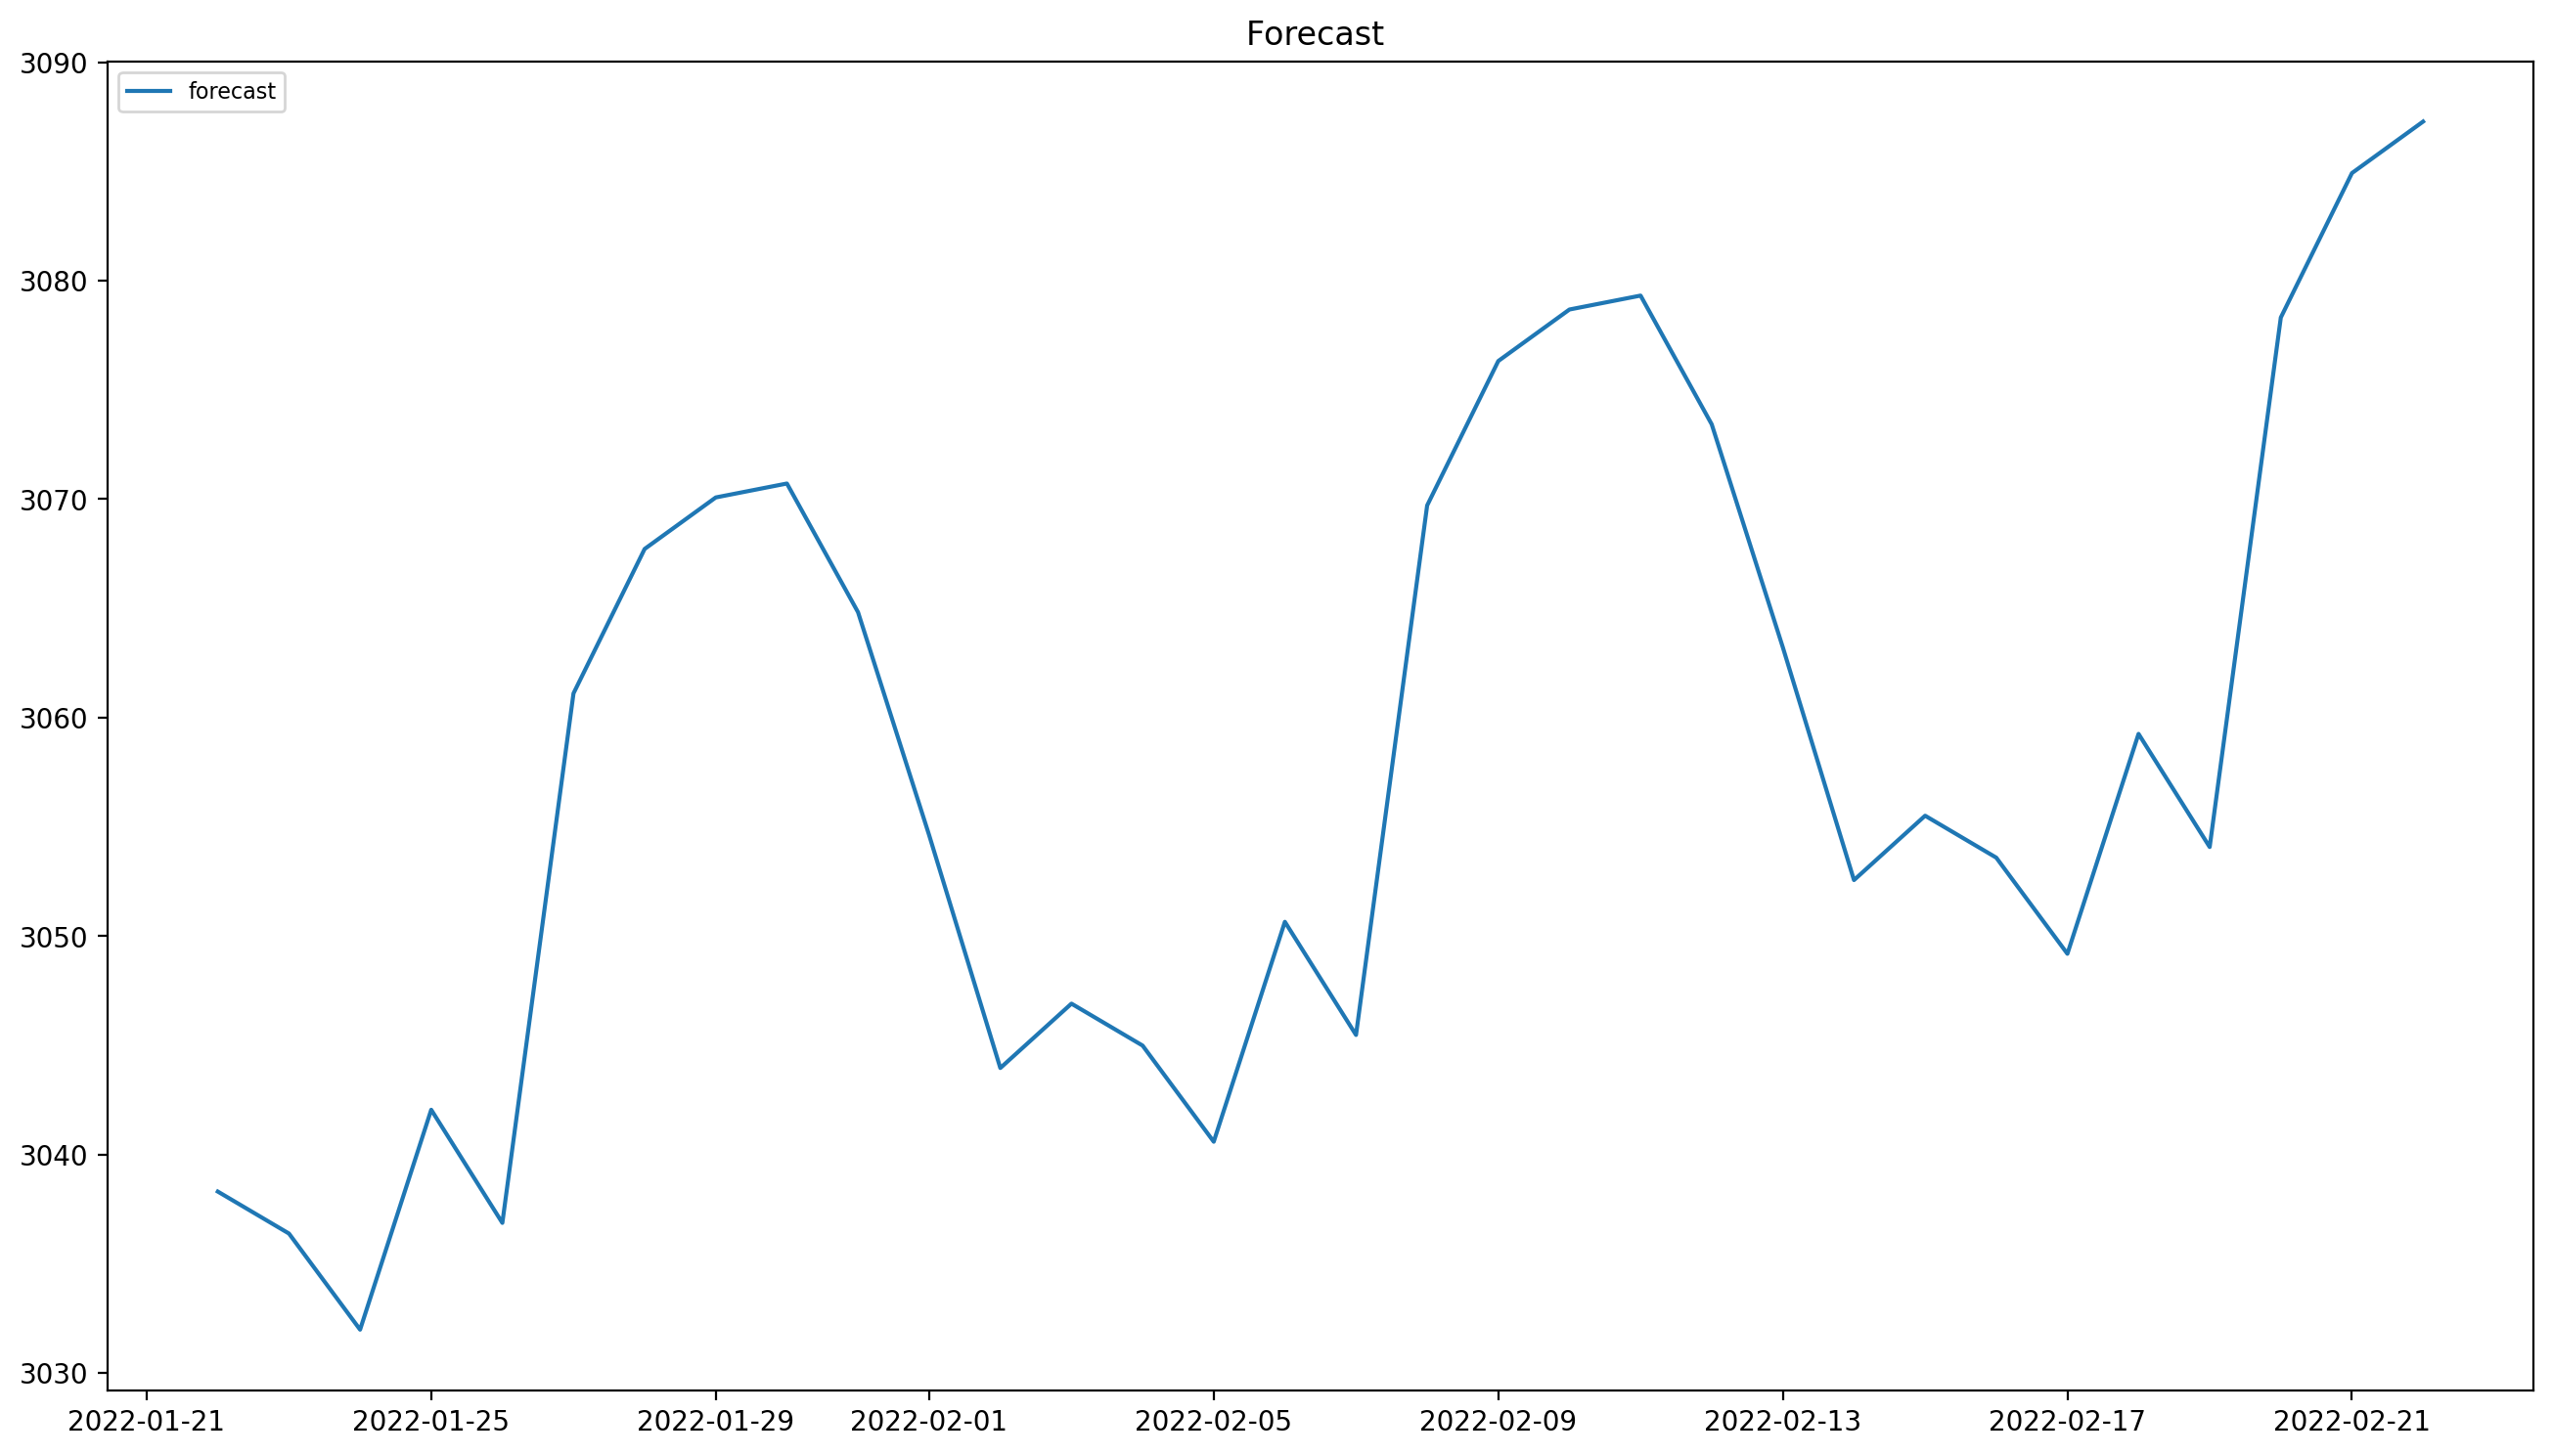

In [ ]:
plt.figure(figsize=(16,9), dpi=200)
plt.plot(new_df["Forcast"], label='forecast')
plt.legend(loc='upper left', fontsize = 8)
plt.title('Forecast ')
plt.show()